In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dengue_2016 = pd.read_csv('data/dengue/hdx/doh-epi-dengue-cases-2016.csv', skiprows=[1])
dengue_2016.head()

,loc,cases,deaths,date,Region,year
0,ALBAY,15,0,10/01/2016,REGION V-BICOL REGION,2016
1,ALBAY,13,0,17/01/2016,REGION V-BICOL REGION,2016
2,ALBAY,9,0,24/01/2016,REGION V-BICOL REGION,2016
3,ALBAY,14,0,31/01/2016,REGION V-BICOL REGION,2016
4,ALBAY,9,0,07/02/2016,REGION V-BICOL REGION,2016


In [16]:
dengue_2016_region6 = dengue_2016[dengue_2016['Region'].str.startswith('REGION VI-')]
dengue_2016_region6.head()

,loc,cases,deaths,date,Region,year
1989,AKLAN,50,0,10/01/2016,REGION VI-WESTERN VISAYAS,2016
1990,AKLAN,32,0,17/01/2016,REGION VI-WESTERN VISAYAS,2016
1991,AKLAN,32,0,24/01/2016,REGION VI-WESTERN VISAYAS,2016
1992,AKLAN,22,0,31/01/2016,REGION VI-WESTERN VISAYAS,2016
1993,AKLAN,27,0,07/02/2016,REGION VI-WESTERN VISAYAS,2016


In [24]:
dengue_2016_region6['date'] = pd.to_datetime(dengue_2016_region6['date'], format = '%d/%m/%Y')

C:\Users\jacob\AppData\Local\Temp\ipykernel_5020\2650439937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2016_region6['date'] = pd.to_datetime(dengue_2016_region6['date'], format = '%d/%m/%Y')


In [25]:
dengue_2016_region6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408 entries, 1989 to 2396
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   loc     408 non-null    object        
 1   cases   408 non-null    int64         
 2   deaths  408 non-null    int64         
 3   date    408 non-null    datetime64[ns]
 4   Region  408 non-null    object        
 5   year    408 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 22.3+ KB


In [17]:
dengue_2016_region6['loc'].unique()

array(['AKLAN', 'ANTIQUE', 'BACOLOD CITY', 'CAPIZ', 'GUIMARAS', 'ILOILO',
       'ILOILO CITY', 'NEGROS OCCIDENTAL'], dtype=object)

<Axes: xlabel='loc'>

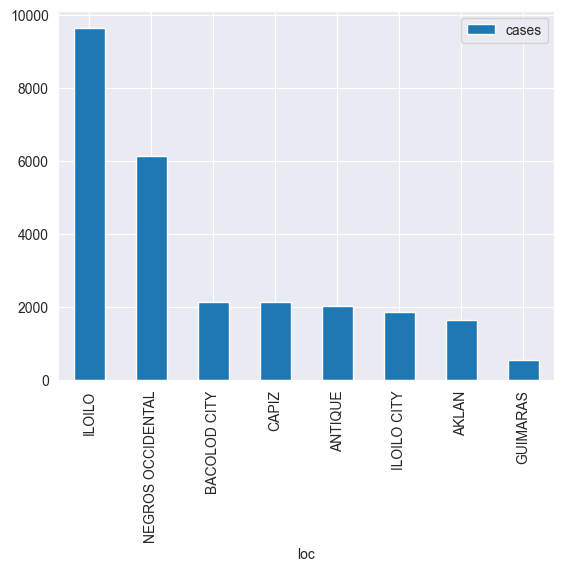

In [22]:
dengue_cases_grouped = dengue_2016_region6.groupby('loc').agg({'cases': 'sum'}).sort_values('cases', ascending=False)
dengue_cases_grouped.plot(kind='bar')

Text(0.5, 1.0, 'Dengue Cases in Region VI (2016)')

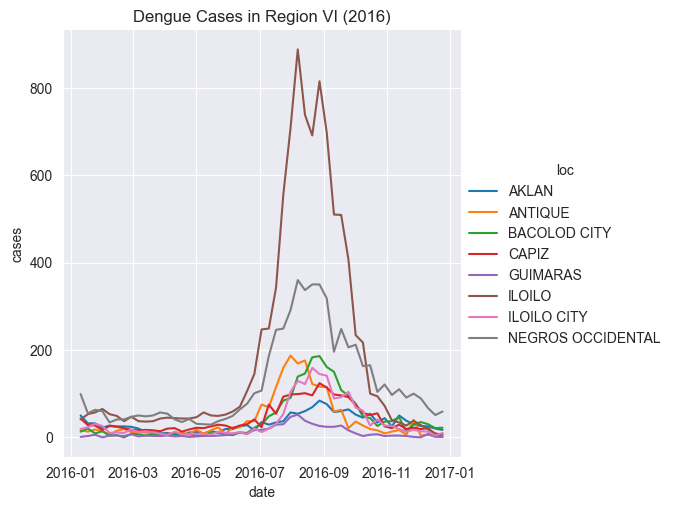

In [28]:
sns.relplot(data = dengue_2016_region6, x = 'date', y = 'cases', hue = 'loc', kind = 'line')
plt.title('Dengue Cases in Region VI (2016)')